In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Introduction
I start with a quick analysis of the dataset

In [3]:
df = pd.read_csv("ncdatachallenge-2021-v1.csv")

# Explore the dataset
print("Variable names: ", list(df.columns))
df = df.drop(["Unnamed: 0"], axis =1)

#df["outcome"]) # text -> must be changed to numbers for plotting
df["pregnant"] = np.where(df["outcome"] == "pregnant", 1, 0)  # outcome as boolean

n_total = len(df)
n_pregnant = np.sum(df["pregnant"])

print("total # of women ", n_total)
print("total # of pregnang women ", n_pregnant, "(",n_pregnant/n_total*100,"%)")

print("data from # cycles between ", np.min(df["n_cycles_trying"]), " and ", np.max(df["n_cycles_trying"]))


n_total = len(df)
n_pregnant = np.sum(df["pregnant"])


Variable names:  ['Unnamed: 0', 'bmi', 'age', 'country', 'been_pregnant_before', 'education', 'sleeping_pattern', 'n_cycles_trying', 'outcome', 'dedication', 'average_cycle_length', 'cycle_length_std', 'regular_cycle', 'intercourse_frequency']
total # of women  1995
total # of pregnang women  1148 ( 57.54385964912281 %)
data from # cycles between  1  and  26


# Question 1: What is the chance of getting pregnant within 13 cycles?

- Assuming that the ~2k women in the dataset are a good representation of the general users of NC.
- Chance of getting pregnant will be given by the fraction of women that got pregnant within those 13 cycles


In [4]:
# Question: Chance of getting pregnant after X cycles?


def pregnancy_chance(df, n_cycles, cond, verbose=False):

    if cond == "after": 
        selected_df = df[df["n_cycles_trying"] > n_cycles]
    elif cond == "before": 
        selected_df = df[df["n_cycles_trying"] < n_cycles]
    elif cond == "within": 
        selected_df = df[df["n_cycles_trying"] <= n_cycles]
    elif cond == "at": 
        selected_df = df[df["n_cycles_trying"] == n_cycles]
    else:
        print("Unkown condition! choose between after, before, within or at")
        
        
    t = len(df)
    p = np.sum(selected_df["pregnant"])
    
    fraction_preg = round(p/t*100, 1)
    
    # Let's calculate the uncertainty too!
    # Pregnant or not -> binomial distribution
    
    error = np.sqrt(fraction_preg * (100- fraction_preg)/t)
    
    #print("\n the standard error is ", error, "%")
    
    print("\n * Chance of getting pregnant ",cond," ", n_cycles, " cycles in NC ?", fraction_preg,"+/- ", error, "%")

    return t, p
    
t, p  = pregnancy_chance(df, 13, "within", verbose=True)

t, p = pregnancy_chance(df, 13, "after", verbose=True)

t, p = pregnancy_chance(df, 13, "at", verbose=True)



 * Chance of getting pregnant  within   13  cycles in NC ? 57.5 +/-  1.1067688753115512 %

 * Chance of getting pregnant  after   13  cycles in NC ? 0.0 +/-  0.0 %

 * Chance of getting pregnant  at   13  cycles in NC ? 0.4 +/-  0.14131498438605186 %


# Answer 1: What is the chance of getting pregnant within 13 cycles?

-  It is very likely to get pregnant within 13 cycles using NC Plan Pregnancy. There is a 57% chance to do so and the standard error associated to this calculation is small ~1%. 

Extra info:

- Unfortunatley, after 13 cycles of using NC Plan Pregnancy, it is very unlikely that a woman that is not yet pregnant will be. According to the current (limited) data there is a 0% chance that a woman that has been trying to get pregnant with the assistance of NC Pregnancy Plans for more than 13 months gets pregnant. 

# Question 2: How long does it usually take to get pregnant?

To answer this question I need to study the n_cycles_trying distribution for those women that succeeded getting pregnant

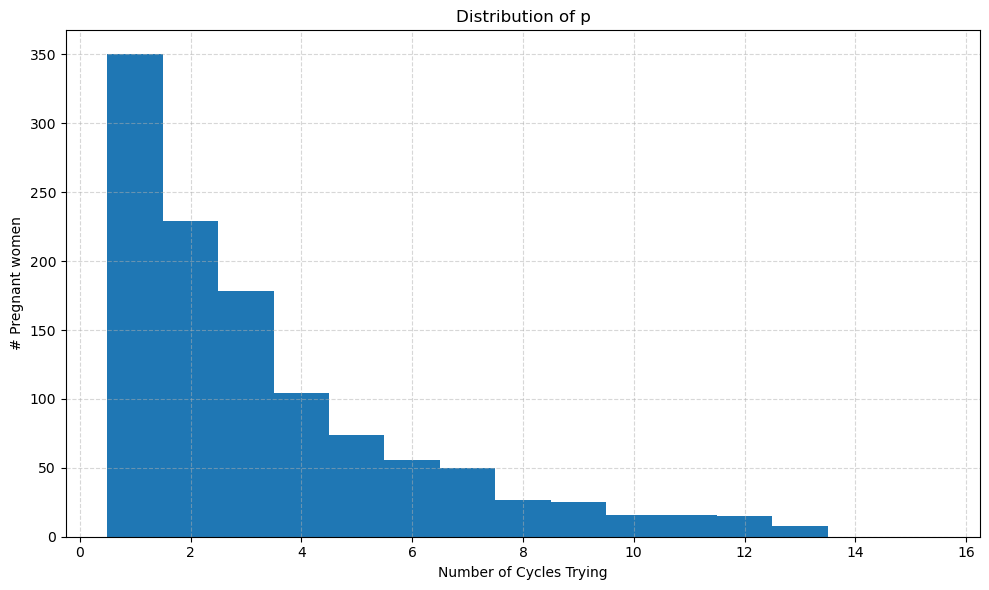

On average it takes  3.3754355400696863 cycles to get pregnant but given that the distribution is skewed towards 1 cycle, the median is a better representation since it's less sensitive to outliers.
The median of cycles it takes to get pregnant is  2.0


In [4]:
# We need to study the n_cycles_trying distribution for pregnant women

p_df = df[df["pregnant"] == 1]


plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(
    p_df["n_cycles_trying"],
    bins=np.linspace(0.5, 15.5, 16)  ,
)

plt.xlabel("Number of Cycles Trying")
plt.ylabel("# Pregnant women")
plt.title("Distribution of p")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print("On average it takes ", np.mean(p_df["n_cycles_trying"]), "cycles to get pregnant but given that the distribution is skewed towards 1 cycle, the median is a better representation since it's less sensitive to outliers.")

print("The median of cycles it takes to get pregnant is ", np.median(p_df["n_cycles_trying"]))

In [5]:
print("# cycles it takes to get pregnant for 50% percentile of the women: ", stats.scoreatpercentile(p_df["n_cycles_trying"], 50))
print("# cycles it takes to get pregnant for 60% percentile of the women: ", stats.scoreatpercentile(p_df["n_cycles_trying"], 60))
print("# cycles it takes to get pregnant for 70% percentile of the women: ", stats.scoreatpercentile(p_df["n_cycles_trying"], 70))
print("# cycles it takes to get pregnant for 80% percentile of the women: ", stats.scoreatpercentile(p_df["n_cycles_trying"], 80))
print("# cycles it takes to get pregnant for 90% percentile of the women: ",stats.scoreatpercentile(p_df["n_cycles_trying"], 90))


# cycles it takes to get pregnant for 50% percentile of the women:  2.0
# cycles it takes to get pregnant for 60% percentile of the women:  3.0
# cycles it takes to get pregnant for 70% percentile of the women:  4.0
# cycles it takes to get pregnant for 80% percentile of the women:  5.0
# cycles it takes to get pregnant for 90% percentile of the women:  7.0


In [6]:
# Let's plot distribution both for pregnant and non-pregnant to compare
#ax = df.plot.hist(column=["n_cycles_trying"], by="outcome", figsize=(10, 8))

n_pregnant_cycle_1 = np.sum(p_df["n_cycles_trying"] ==1)
#n_not_pregnant_cycle_1 =  np.sum(df[df["pregnant"] == 0]["n_cycles_trying"] ==1)

print("# Women pregnant after a single cycle? ", n_pregnant_cycle_1, "( ", n_pregnant_cycle_1/n_total*100,"%)")

# Women pregnant after a single cycle?  350 (  17.543859649122805 %)


# Answer 2:  How long does it usually take to get pregnant?
- Half of the women using NC Plan pregnancy that end up pregnant do so within the first 2 cycles!

Extra info:

- 17.5% of the women get pregnant at the first cycle
- 80% of the women get pregnant within 5 cycles
- 90% of the women get pregnant within 7 cycles

# Question 3: What factors impact the time it takes to get pregnant?

- In order to undrestand which factors impact most the pregnancy outcome we must look for correlations between the outcome column and others. 

- In order to understand what factors impact the time it takes to get pregnant we need to

  1) Select only pregnant women
  2) Study the correlations between the 'n_cycles_trying' variable and others for pregnant women.


- Given the nature of the data, the first step is to modify the variables that are stored as strings and store them in numeric values in order to be able to build the correlation matrices.

In [7]:
# we need to build a correlation matrix, but we can't use non-numeric values

# store data in numerical format (like I did for outcome -> pregnant)

problematic_variables = [i for i in df.columns if df[i].dtype == object]

print("The following variables are problematic becuase they contain non numerical values ", problematic_variables, "converting them to numbers now in new 'fixed' column : \n ")

# outcome was already fix

map_dict = {}
for v in problematic_variables:
    #print(set(df[v]))
    df["fixed_"+v], mapping = pd.factorize(df[v])
    map_dict[v] = {label: idx for idx, label in enumerate(mapping)}
    
# country -> probably not relevant
# been pregnant before YES

for v in problematic_variables:
    print("\n Fixed variable '",v,"' with mapping: ")
    print(map_dict[v])


The following variables are problematic becuase they contain non numerical values  ['country', 'been_pregnant_before', 'education', 'sleeping_pattern', 'outcome', 'regular_cycle'] converting them to numbers now in new 'fixed' column : 
 

 Fixed variable ' country ' with mapping: 
{'SE': 0, 'AU': 1, 'DK': 2, 'GB': 3, 'US': 4, 'DE': 5, 'FI': 6, 'FR': 7, 'NL': 8, 'CH': 9, 'BE': 10, 'AO': 11, 'CA': 12, 'BR': 13, 'AE': 14, 'NZ': 15, 'IL': 16, 'NO': 17, 'IE': 18, 'EE': 19, 'CL': 20, 'ES': 21, 'AT': 22, 'MT': 23, 'ZA': 24, 'HU': 25, 'SI': 26, 'IS': 27, 'PL': 28, 'KE': 29, 'PT': 30, 'AR': 31, 'MY': 32, 'FO': 33}

 Fixed variable ' been_pregnant_before ' with mapping: 
{'No, never': 0, 'Yes, twice': 1, 'Yes, once': 2, 'Yes 3 times or more': 3}

 Fixed variable ' education ' with mapping: 
{'University': 0, 'High school': 1, 'Trade/technical/vocational training': 2, 'PhD': 3, 'Elementary school': 4}

 Fixed variable ' sleeping_pattern ' with mapping: 
{'Wake same every workday': 0, 'Several tim

In [8]:
# removing fixed outcome column because it represents the same as pregnant column
df = df.drop(["fixed_outcome"], axis =1 )
#print(df.columns)


## I will first study the full dataset, i.e. what impacts the pregnancy outcome the most?

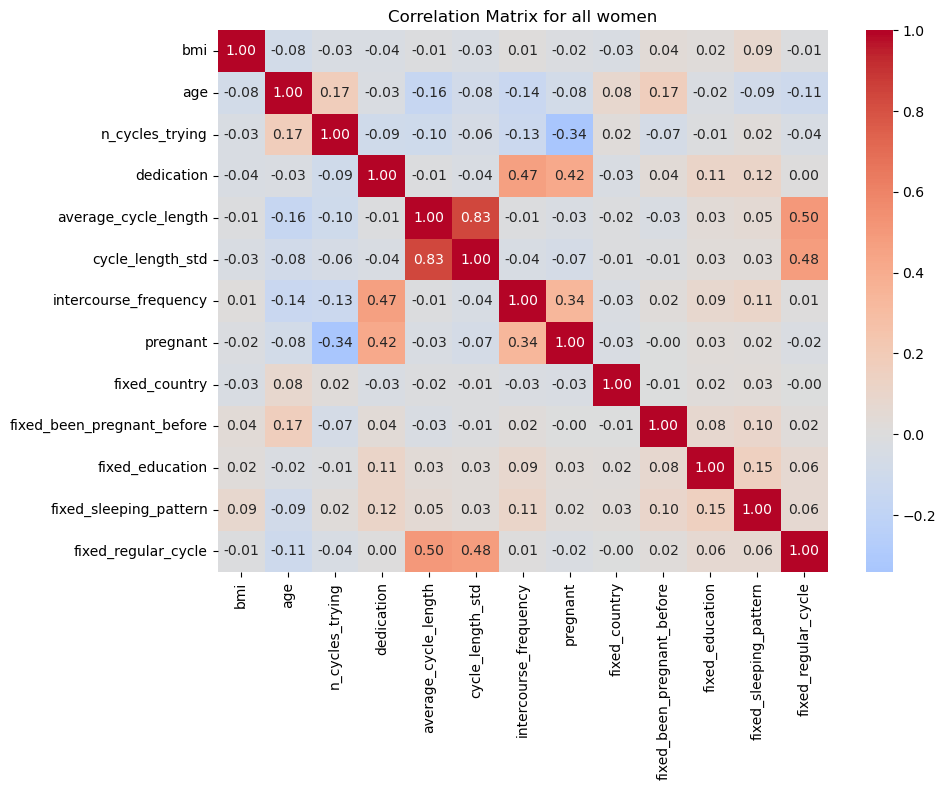

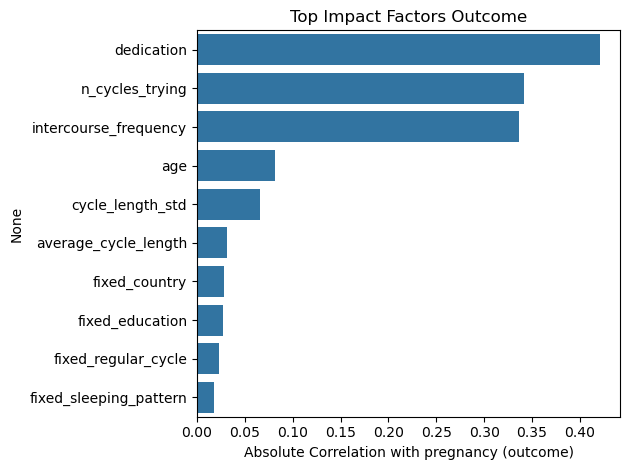

In [17]:

correlation_matrix = df.corr(numeric_only=True)  # Avoids errors from non-numeric cols

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix for all women")
plt.tight_layout()
plt.show()

#print("The pregnant distribution is most correlated with the dedication, intercourse frequency and number of cycles trying distributions")

top_corr = correlation_matrix["pregnant"].drop("pregnant").abs().sort_values(ascending=False).head(10)

sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Impact Factors Outcome")
plt.xlabel("Absolute Correlation with pregnancy (outcome)")
plt.tight_layout()
plt.show()


- The correlation matrix allows us to assess how correlated two distributions are. In this particular case we want to look at the pregnant row and see which columns (excluding the pregnant column) contain the highest absolute values, indicating high correlation (dependency) between variables.

- The pregnant distribution is most correlated with the dedication, intercourse frequency and number of cycles trying distributions

## Now I will focus in the actual question, which concerns only pregnant women

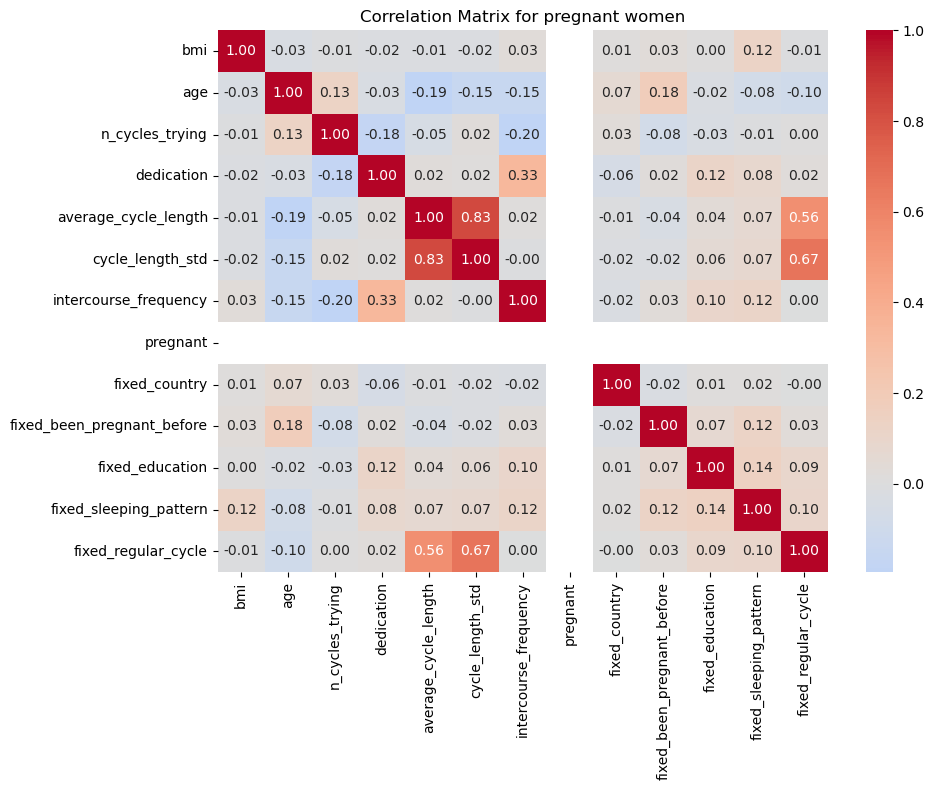

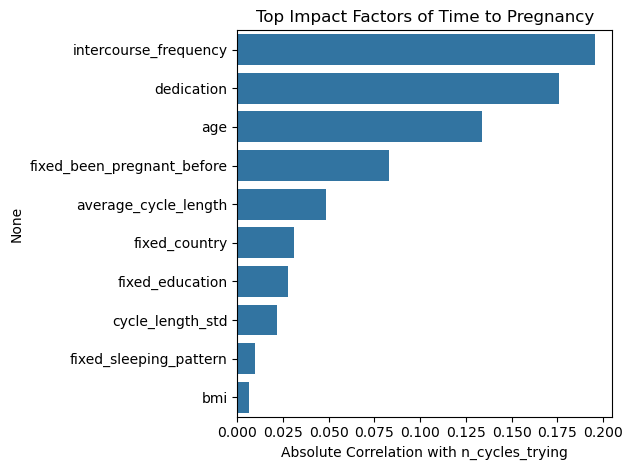

In [10]:
# Now selecting only pregnant women:

p_df = df[df["pregnant"] == 1]

correlation_matrix = p_df.corr(numeric_only=True)  # Avoids errors from non-numeric cols

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix for pregnant women")
plt.tight_layout()
plt.show()

#print("The n_cycles_trying distribution for pregnant women is most correlated with intercourse frequency, dedication and age")


top_corr = correlation_matrix["n_cycles_trying"].drop("n_cycles_trying").abs().sort_values(ascending=False).head(10)

sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Impact Factors of Time to Pregnancy")
plt.xlabel("Absolute Correlation with n_cycles_trying")
plt.tight_layout()
plt.show()


- The n_cycles_trying distribution for pregnant women is most correlated with intercourse frequency, dedication and age

# Answer 3:  What factors impact the time it takes to get pregnant?

- The variables that most impact the time it takes to get pregnat are the 'intercourse frequency', followed by the 'dedication' and the 'age'.
- Furthermore, 'intercourse frequency', 'number of cycles trying' and 'dedication' are also the variables that impact most the overall outcome i.e. whether the woman gets pregnant

# Extra

I plot several distributions below. I used these to validate my results. 

## 2D distribution of n_cycles_trying and the high impact variables. The 2D distributions characterise by a peak in one corner / side of the 2D distribution indicating the nature of the correlation.


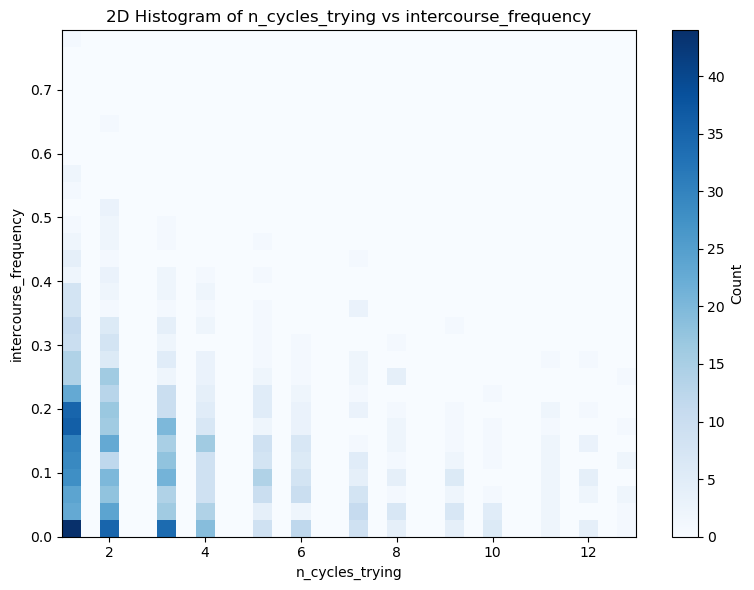

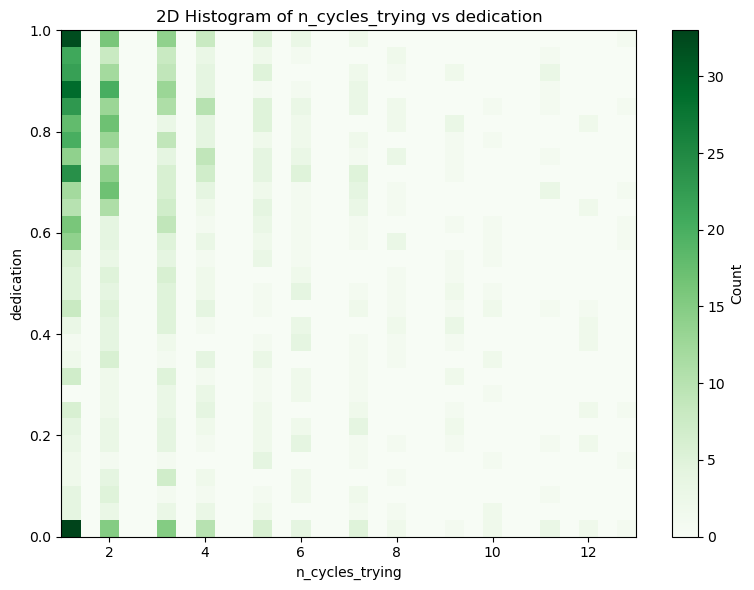

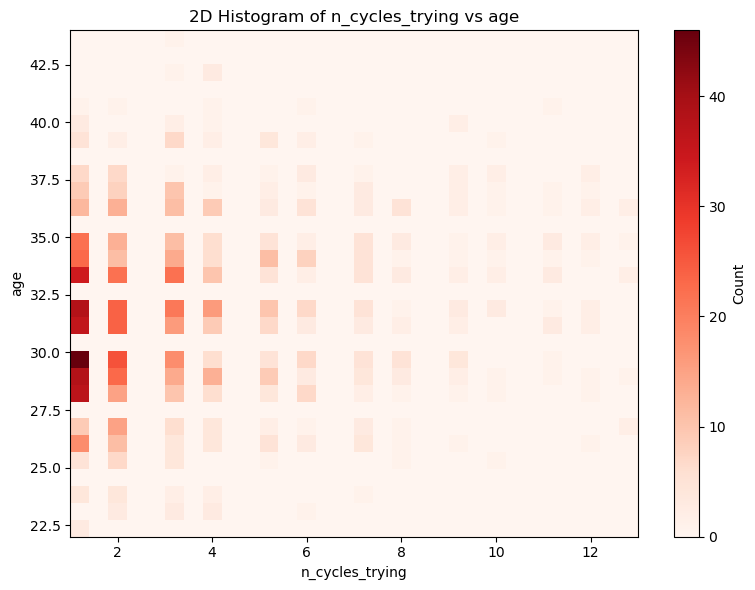

In [11]:
# Let's plot our variables to validate our conclusions form the correlation matrix test!

# Studying the variables that impact how long women take the get pregnant 
# 2D distributions of the n_cycles_trying and the variables that impact it the most, uisng only pregnant women as part of the dataset!

plt.figure(figsize=(8, 6))
plt.hist2d(p_df["n_cycles_trying"], p_df["intercourse_frequency"], bins=30, cmap="Blues")
plt.colorbar(label="Count")
plt.xlabel("n_cycles_trying")
plt.ylabel("intercourse_frequency")
plt.title("2D Histogram of n_cycles_trying vs intercourse_frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.hist2d(p_df["n_cycles_trying"], p_df["dedication"], bins=30, cmap="Greens")
plt.colorbar(label="Count")
plt.xlabel("n_cycles_trying")
plt.ylabel("dedication")
plt.title("2D Histogram of n_cycles_trying vs dedication")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.hist2d(p_df["n_cycles_trying"], p_df["age"], bins=30, cmap="Reds")
plt.colorbar(label="Count")
plt.xlabel("n_cycles_trying")
plt.ylabel("age")
plt.title("2D Histogram of n_cycles_trying vs age")
plt.tight_layout()
plt.show()


## Here I compare the 1D distribution for the variables that impact pregnancy outcome most! I separate them by outcome. The blue (pregnant) and orange (non-pregnant) histograms do not fully overlap, each side is clearly more orange or blue, indicating that these distribution has a large impact on the pregnancy outcome.

Variables which influence pregnancy outcome the most!


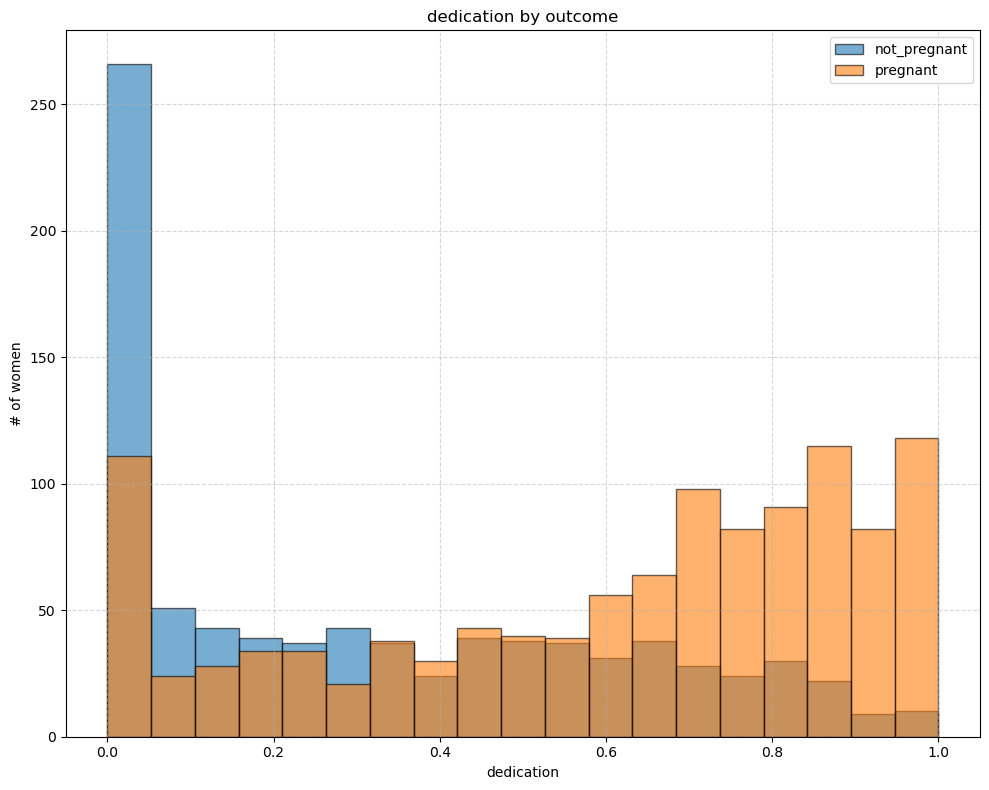

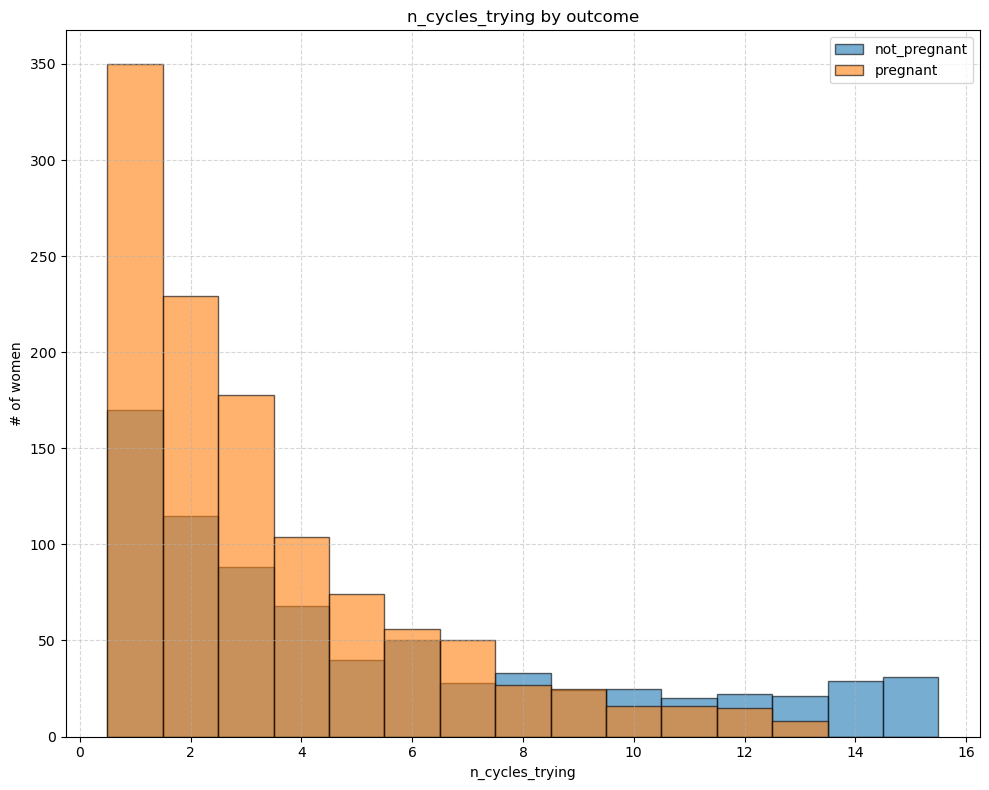

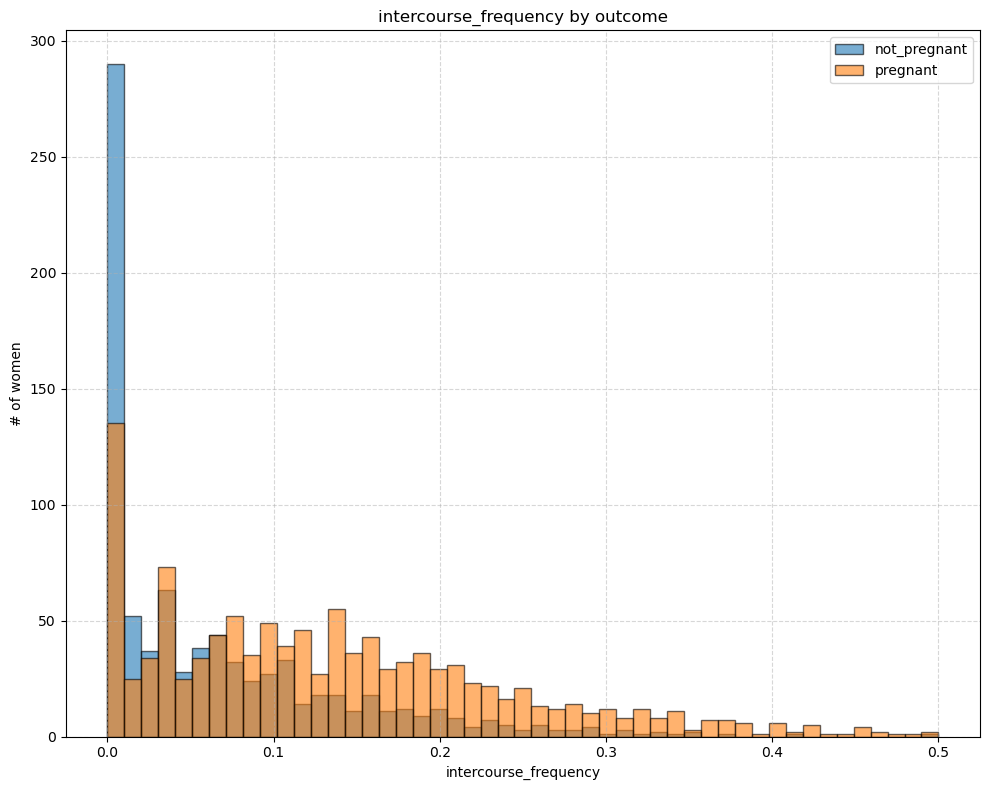

In [12]:

# Let's plot our variables to validate our conclusions form the correlation matrix test!

# Here I take data from both pregnant and non-pregnant somen and I compare the distributions that most impact the pregnancy outcome grouped by outcome 

def PlotHist(v, group_var="outcome", binning=None):
    plt.figure(figsize=(10, 8))

    if binning is None: binning = np.linspace(np.min(df[v]), np.max(df[v]), 20)
    for group, group_data in df.groupby(group_var):
        plt.hist(
            group_data[v].dropna(),
            bins=binning, 
            alpha=0.6,
            label=group,
            edgecolor='black',
        )
    
    plt.title(v +" by "+group_var)
    plt.xlabel(v)
    plt.ylabel("# of women")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

print("Variables which influence pregnancy outcome the most!")

PlotHist("dedication", binning=np.linspace(0, 1, 20))

PlotHist("n_cycles_trying", binning=np.linspace(0.5, 15.5, 16))

PlotHist("intercourse_frequency", binning=np.linspace(0, 0.5, 50))


## Now I do the same for the low impact variables. There is no clear deparation between orange and blue, validating the conclusion that they have a low impact on the outcome. 

It is particularly interesting to observe that Age, which is the 4th variable with highest impact does show a clear difference between blue and orange in the edges i.e. a woman that is very young or very old is less likely to get pregnant. The available data for those age ranges is however small, resulting in a low correlation.

- Regarding young women i.e. between 18 and 22 not getting pregnant: I believe that the fact that a woman of this young age is using NC Plan Pregnancy is likely an indication of she having previously tried to conceive and failed, therefore indicating some medical difficulties from her or her partner. One should not conclude that women between 18 and 22 have a harder time getting pregnant overall than those who are in their 30s. 

Variables that do NOT influence pregnancy outcome


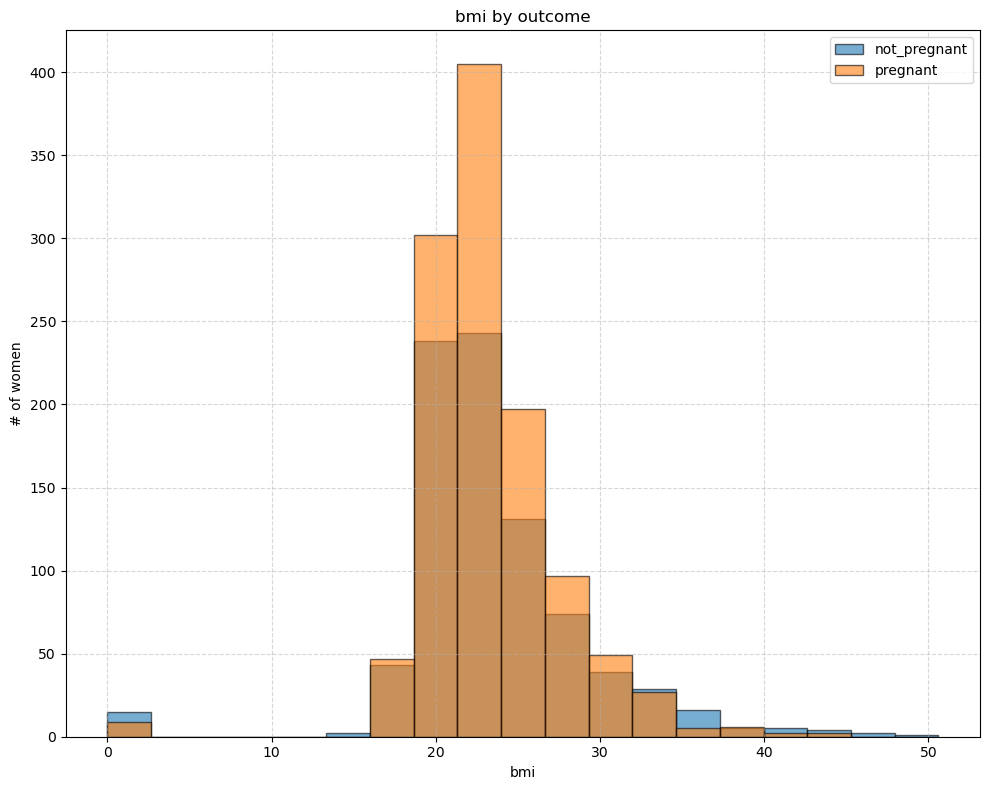

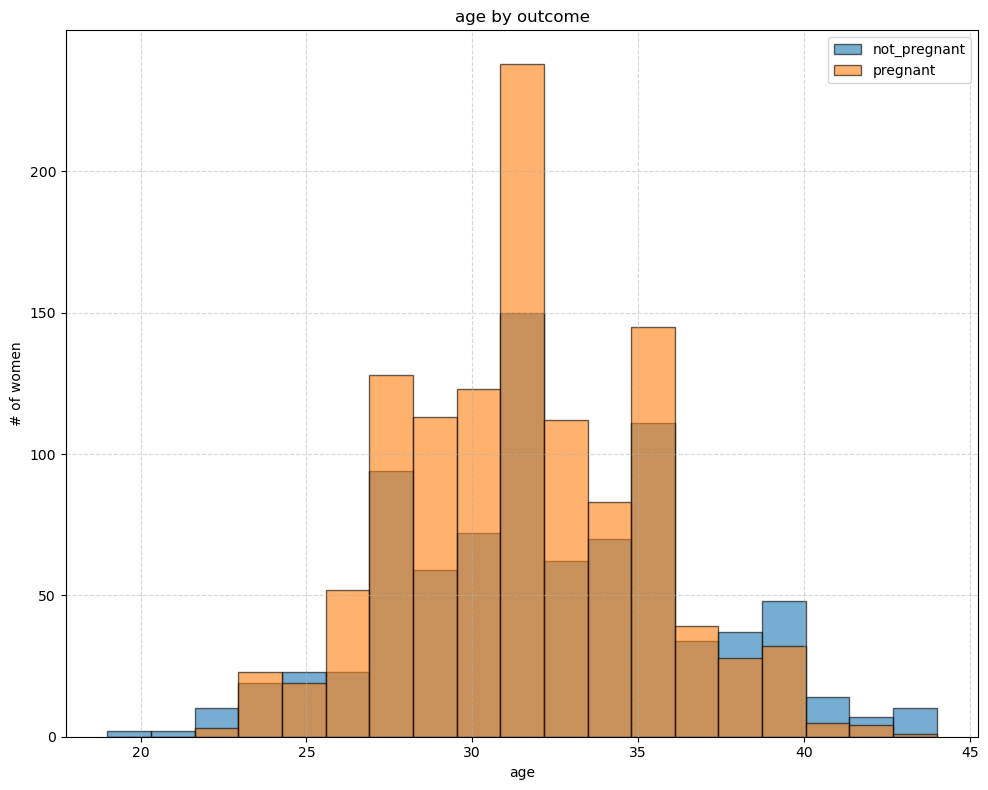

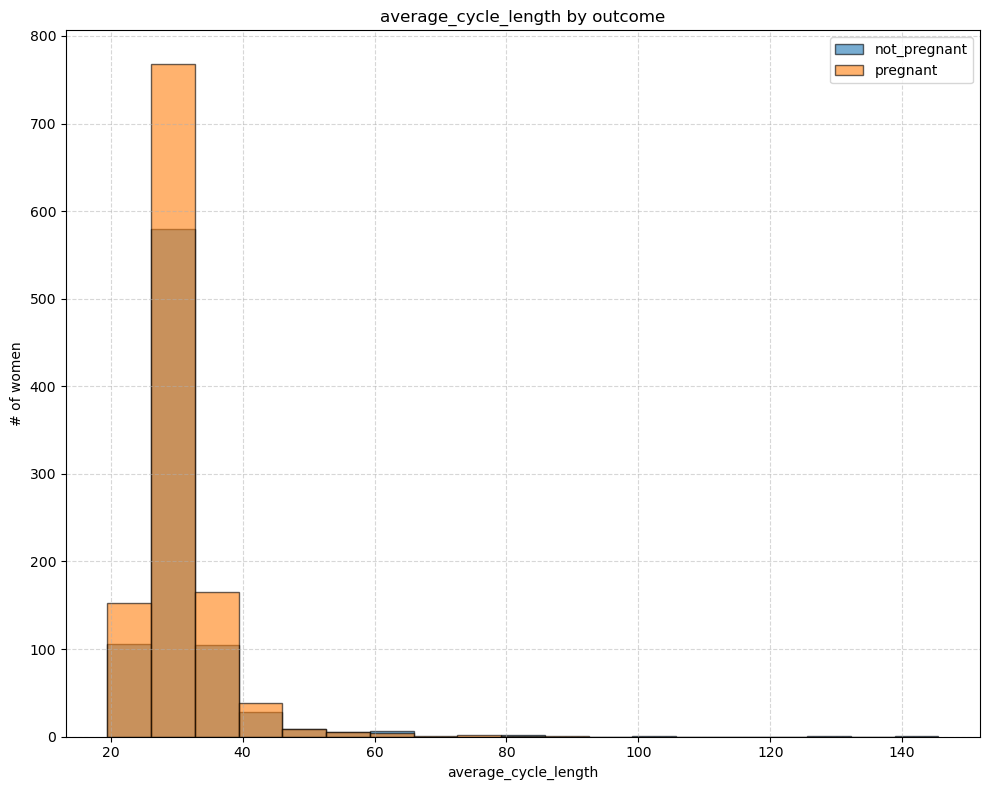

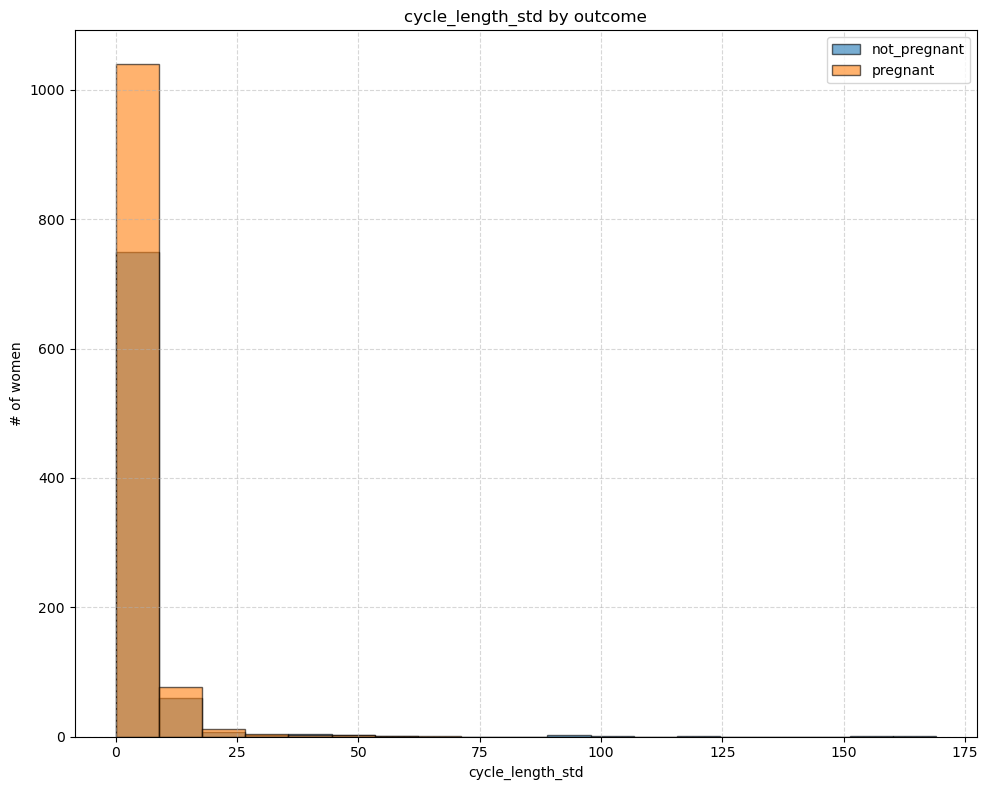

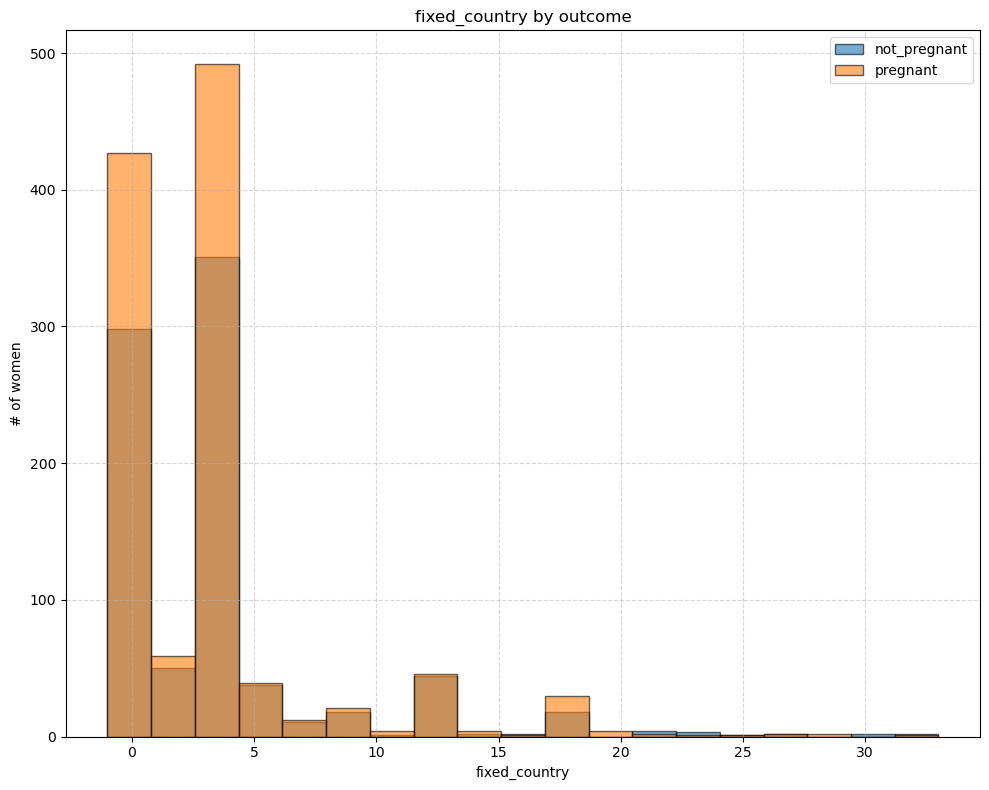

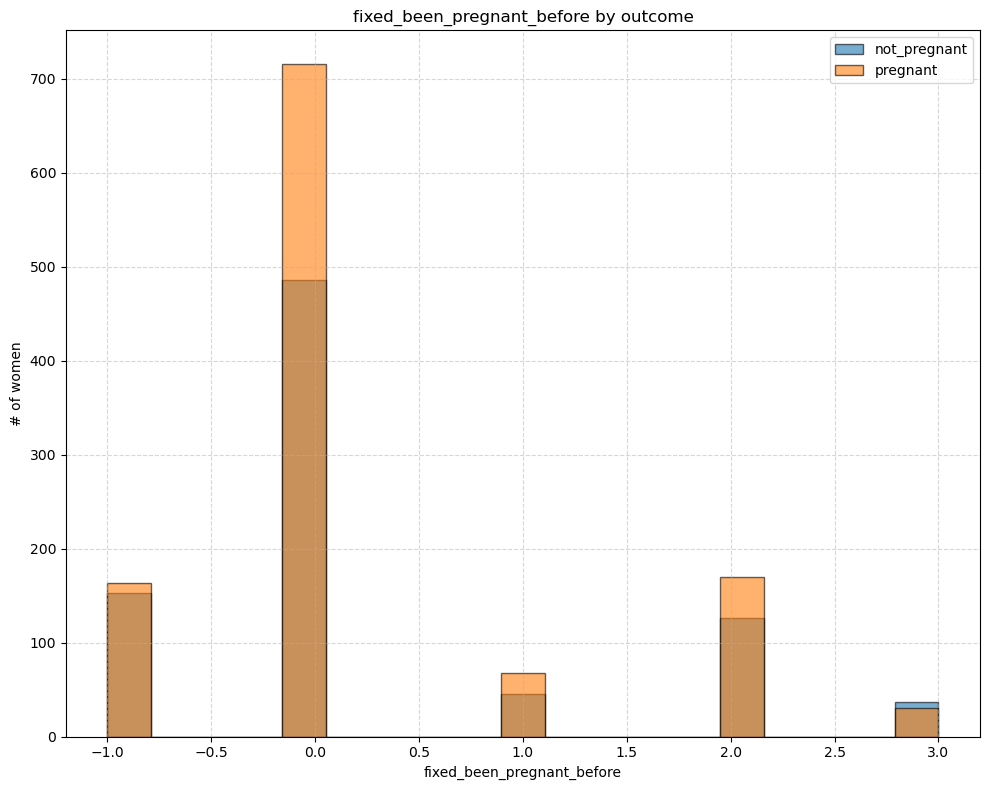

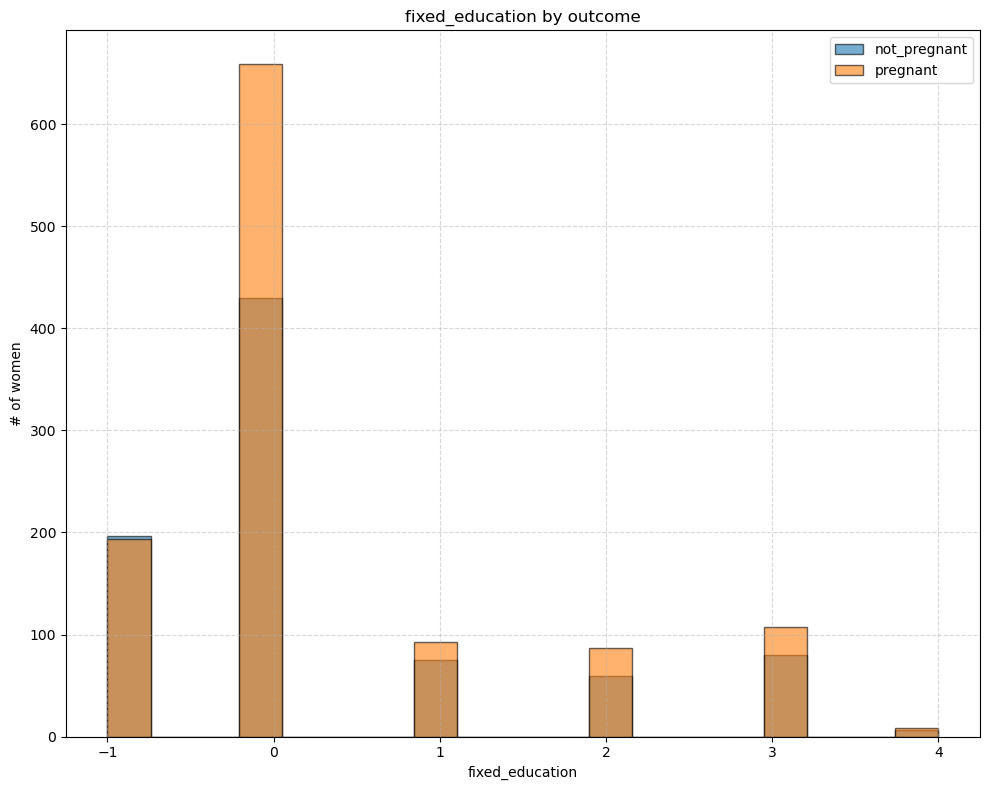

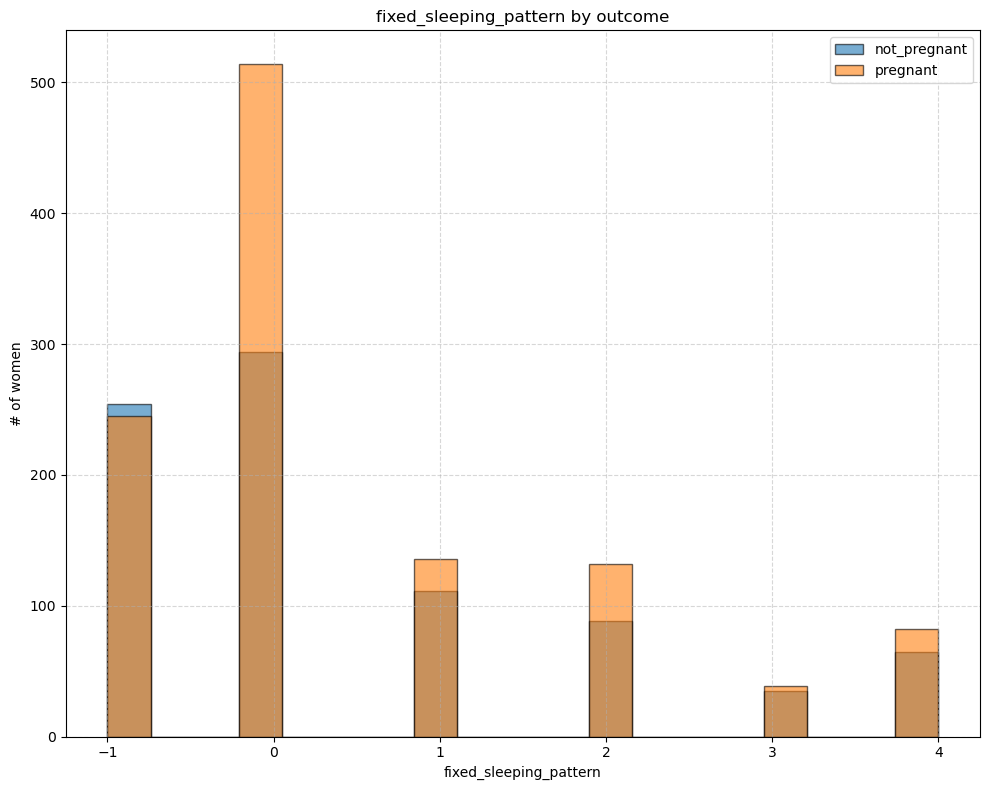

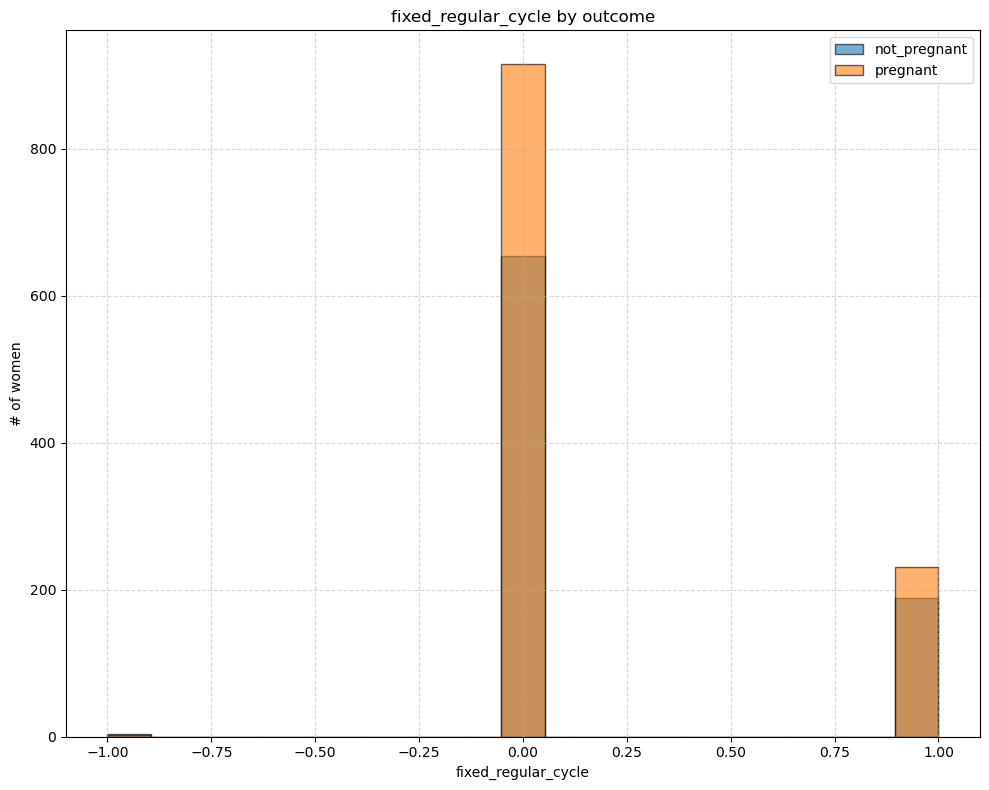

In [14]:
print("Variables that do NOT influence pregnancy outcome")

for v in list(df.columns):
    if v in ["dedication", "n_cycles_trying", "intercourse_frequency", "pregnant"]: continue # you already plotted them above
    if df[v].dtype != object:
        PlotHist(v)